<a href="https://colab.research.google.com/github/spoorthi2003/2216145_aiml-boot-camp/blob/main/Day7_suv_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/SUV_Purchase.csv'

In [ ]:
import pandas as pd 
df=pd.read_csv(dataset)
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
import seaborn as sns
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#data processing
from sklearn import preprocessing  
#labelencodingg
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.Gender=LE.fit_transform(df.Gender)

In [ ]:
df.Gender

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
from matplotlib.axis import YTick

#method 2 to load the data in the form of arrays -by library numpy

import numpy as np

x1=np.array(df[['Gender','EstimatedSalary','Age']])
x2=np.array(df[['Gender','EstimatedSalary','Age']])
x3=np.array(df[['Gender','EstimatedSalary','Age']])
y=np.array(df[['Purchased']])

In [ ]:
x=np.concatenate((x1,x2,x3),axis=1)#combine independent x1,x2,x3 values into x
x

array([[    1, 19000,    19, ...,     1, 19000,    19],
       [    1, 20000,    35, ...,     1, 20000,    35],
       [    0, 43000,    26, ...,     0, 43000,    26],
       ...,
       [    0, 20000,    50, ...,     0, 20000,    50],
       [    1, 33000,    36, ...,     1, 33000,    36],
       [    0, 36000,    49, ...,     0, 36000,    49]])

In [ ]:
#importing standard scalar from scikit-learn
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x= sc.fit_transform(x)

#x_test = sc.transform(x_test)

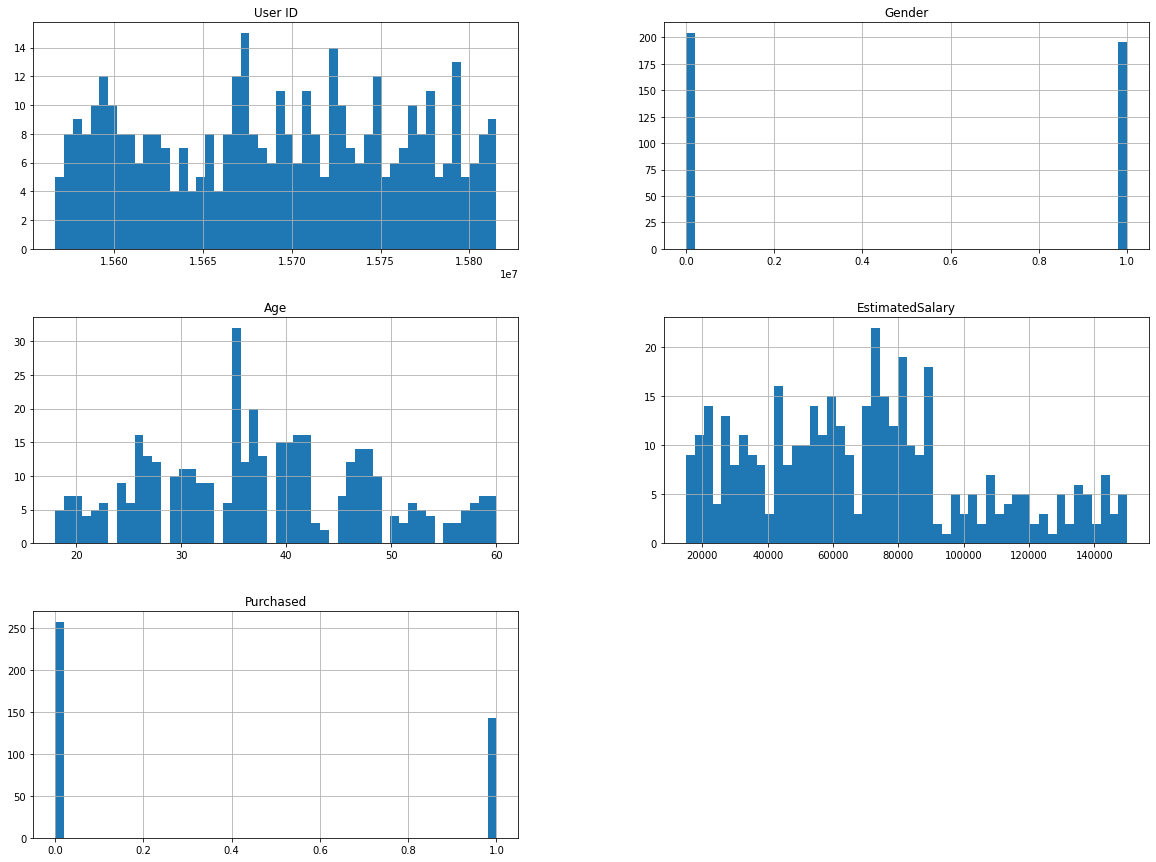

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# EstimatedSalary : Outliers handling
df = df.drop(df.query("EstimatedSalary > 120000 and Purchased == 0").index)# Age : Outliers handling
df = df.drop(df.query("Age > 55 and Purchased == 0").index)

In [ ]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))#predictated and actual value

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


In [ ]:
print("predicted value for training data:",model.score(x_train,y_train))

predicted value for training data: 0.828125


In [ ]:
print("predicted value for testing data:",model.score(x_test,y_test))

predicted value for testing data: 0.925


In [ ]:
accuracy=model.score(x,y)*100
print(accuracy)

84.75


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test, y_pred)

[[56  2]
 [ 4 18]]


0.925